In [1]:
###Heart desease project

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



import seaborn as sns

import numpy as np


import matplotlib.pyplot as plt

import pandas as pd




In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

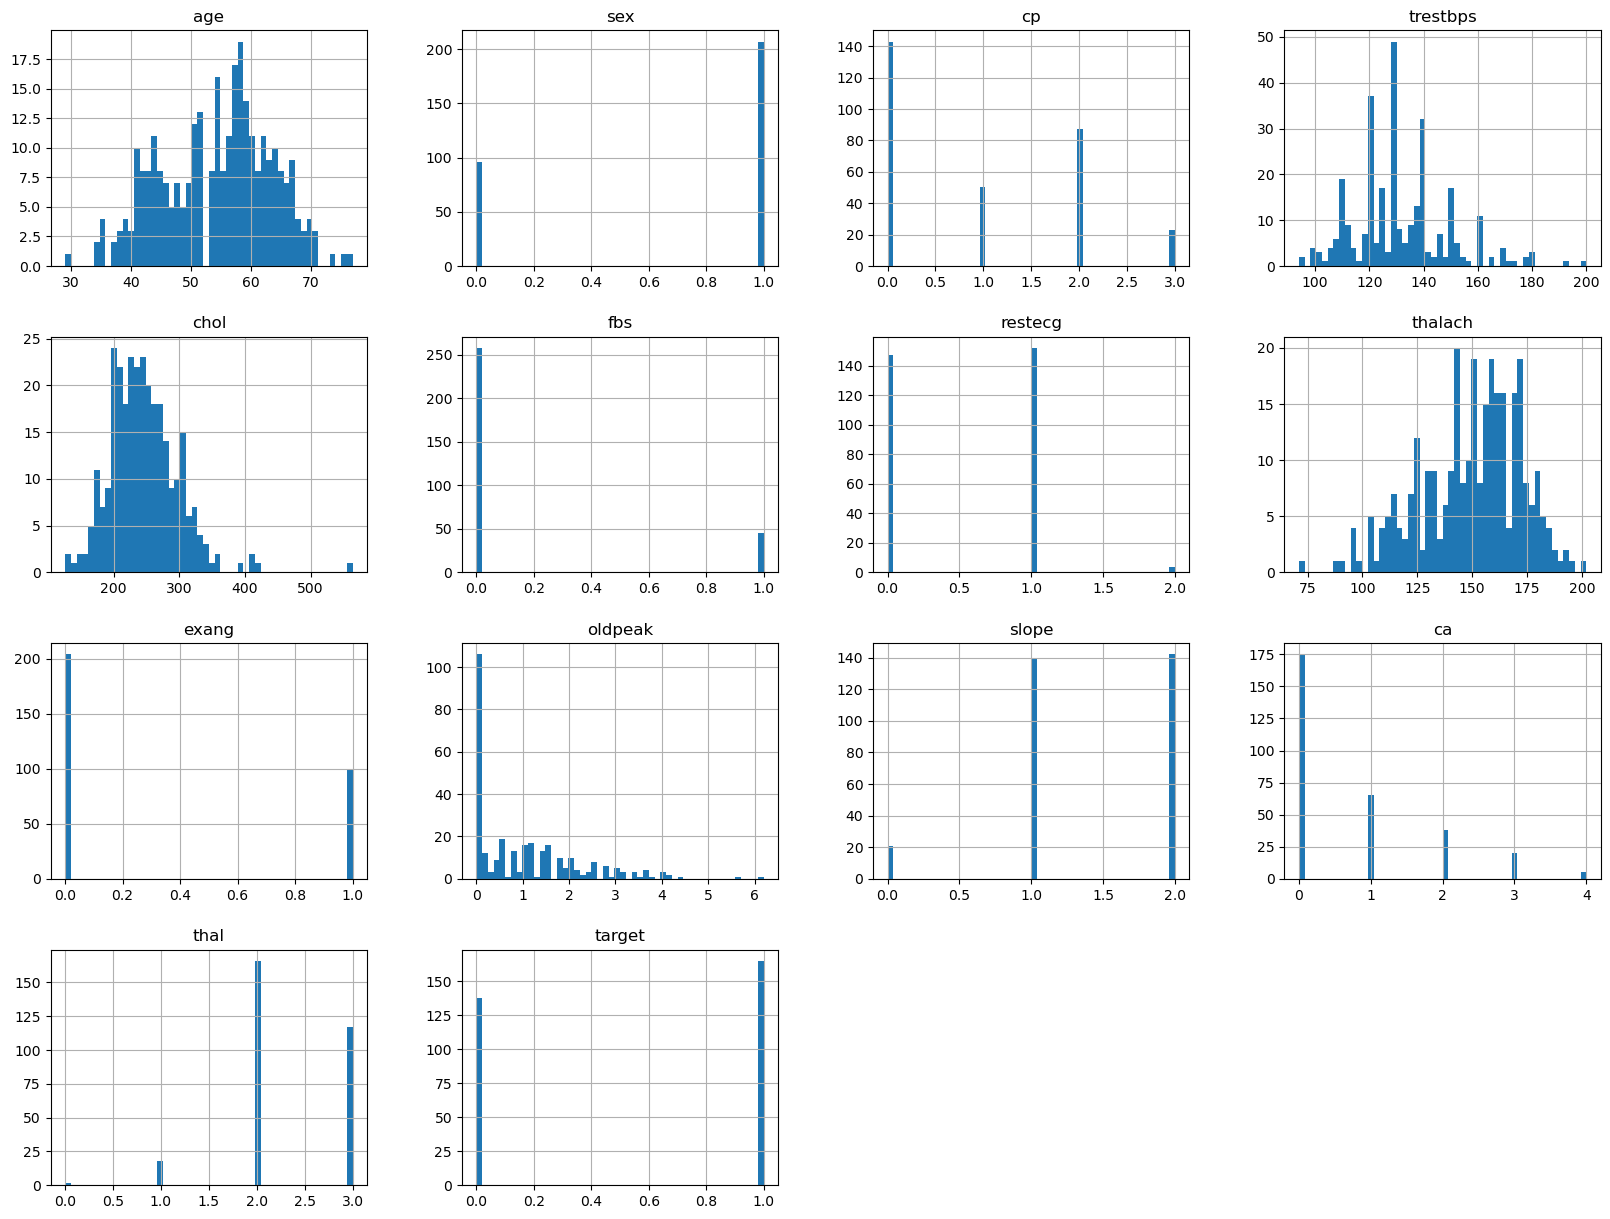

In [6]:
df.hist(bins=50, figsize=(20,15))

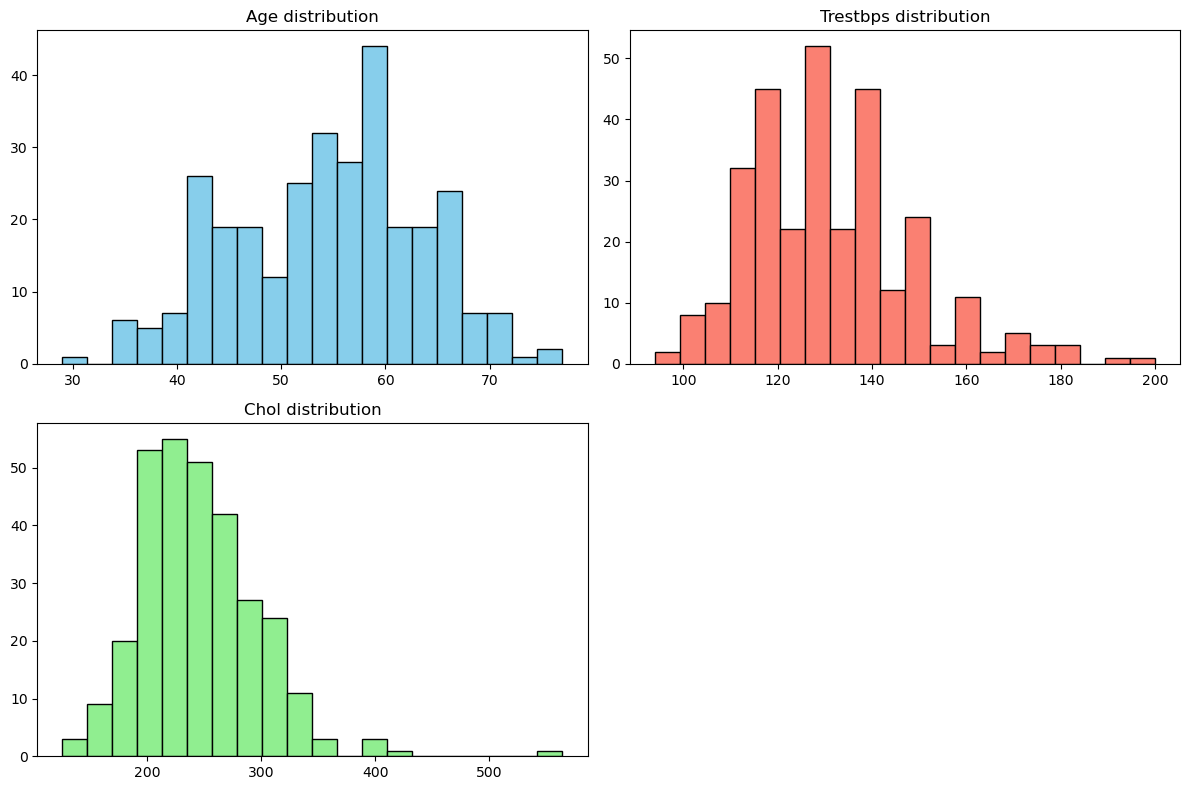

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age distribution')

plt.subplot(2, 2, 2)
plt.hist(df['trestbps'], bins=20, color='salmon', edgecolor='black')
plt.title('Trestbps distribution')

plt.subplot(2, 2, 3)
plt.hist(df['chol'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Chol distribution')

plt.tight_layout()
plt.show()

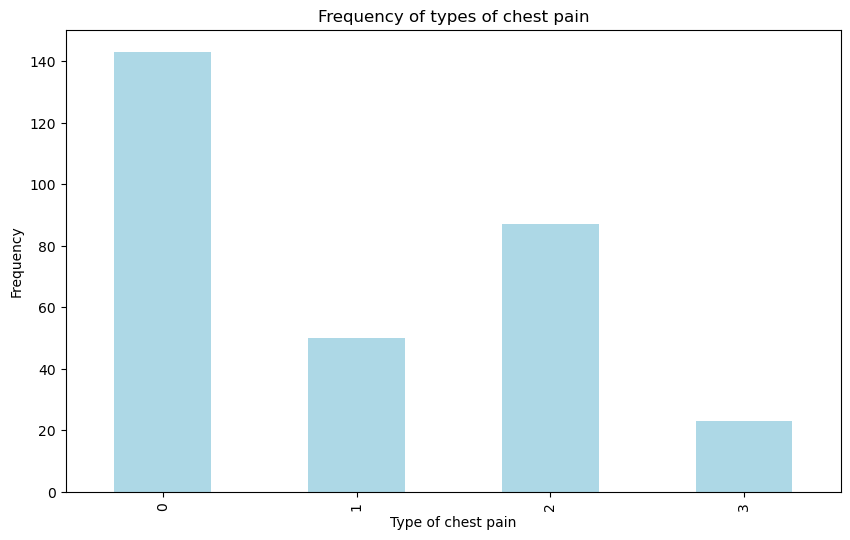

In [8]:
plt.figure(figsize=(10, 6))
df['cp'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Frequency of types of chest pain')
plt.xlabel('Type of chest pain')
plt.ylabel('Frequency')
plt.show()


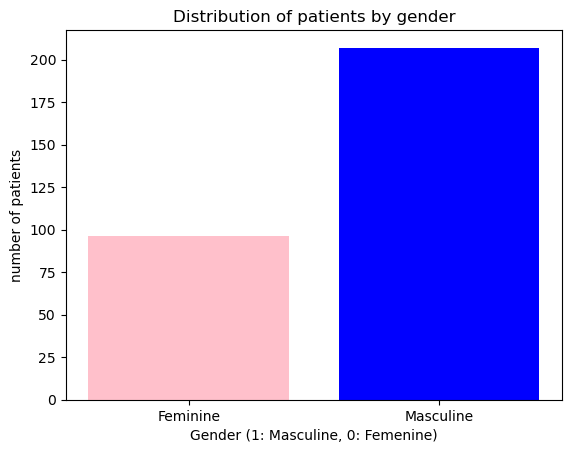

In [9]:

gender_count = df['sex'].value_counts()


plt.bar(gender_count.index, gender_count.values, color=['blue', 'pink'])

plt.title('Distribution of patients by gender')
plt.xlabel('Gender (1: Masculine, 0: Femenine)')
plt.ylabel('number of patients')
plt.xticks(gender_count.index, ['Masculine', 'Feminine'])


plt.show()


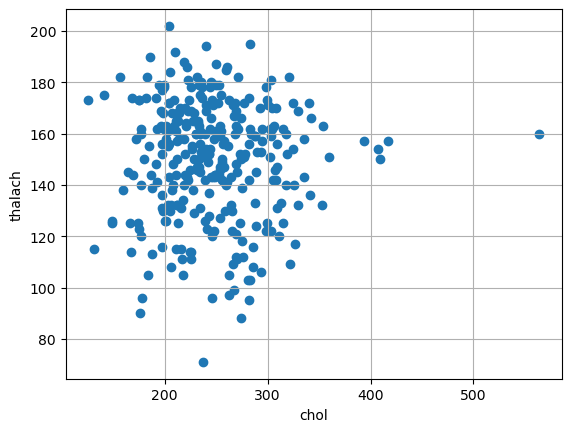

In [10]:
plt.scatter(df.loc[:,'chol'],df.loc[:,'thalach'])
plt.ylabel('thalach')
plt.xlabel('chol')
plt.grid()
plt.show()

In [11]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42) 
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (181, 14)
val_df.shape : (61, 14)
test_df.shape : (61, 14)


In [13]:
train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [14]:
val_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1


In [15]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'target'

target_col


'target'

In [16]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()


In [17]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()


In [18]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()


In [19]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()


In [20]:
imputer = SimpleImputer(strategy = 'mean')


In [21]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [22]:
list(imputer.statistics_)

[54.366336633663366,
 0.6831683168316832,
 0.966996699669967,
 131.62376237623764,
 246.26402640264027,
 0.1485148514851485,
 0.528052805280528,
 149.64686468646866,
 0.32673267326732675,
 1.0396039603960396,
 1.3993399339933994,
 0.7293729372937293,
 2.3135313531353137]

In [23]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [24]:

train_inputs[numeric_cols].isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [25]:
model = LogisticRegression(solver='liblinear')


model.fit(train_inputs, train_targets)


LogisticRegression(solver='liblinear')

In [26]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]


In [27]:
train_preds = model.predict(X_train)

In [28]:
train_preds


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1], dtype=int64)

In [29]:
train_probs= model.predict_proba(X_train)

In [30]:
train_probs

array([[0.08607355, 0.91392645],
       [0.30582781, 0.69417219],
       [0.2829674 , 0.7170326 ],
       [0.53200969, 0.46799031],
       [0.04518538, 0.95481462],
       [0.47403298, 0.52596702],
       [0.07288955, 0.92711045],
       [0.06077574, 0.93922426],
       [0.22706261, 0.77293739],
       [0.99505848, 0.00494152],
       [0.01761423, 0.98238577],
       [0.99847611, 0.00152389],
       [0.06932047, 0.93067953],
       [0.08260003, 0.91739997],
       [0.83347403, 0.16652597],
       [0.56701509, 0.43298491],
       [0.29967444, 0.70032556],
       [0.02378262, 0.97621738],
       [0.16956908, 0.83043092],
       [0.71638231, 0.28361769],
       [0.97839881, 0.02160119],
       [0.25454006, 0.74545994],
       [0.41959794, 0.58040206],
       [0.19713479, 0.80286521],
       [0.21826215, 0.78173785],
       [0.04036642, 0.95963358],
       [0.13486264, 0.86513736],
       [0.28168724, 0.71831276],
       [0.4022365 , 0.5977635 ],
       [0.9867832 , 0.0132168 ],
       [0.

In [31]:
model.classes_


array([0, 1], dtype=int64)

In [32]:
accuracy_score(train_targets, train_preds)

0.8674033149171271

In [33]:
confusion_matrix(train_targets, train_preds, normalize='true')


array([[0.7875    , 0.2125    ],
       [0.06930693, 0.93069307]])

In [34]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 86.74%


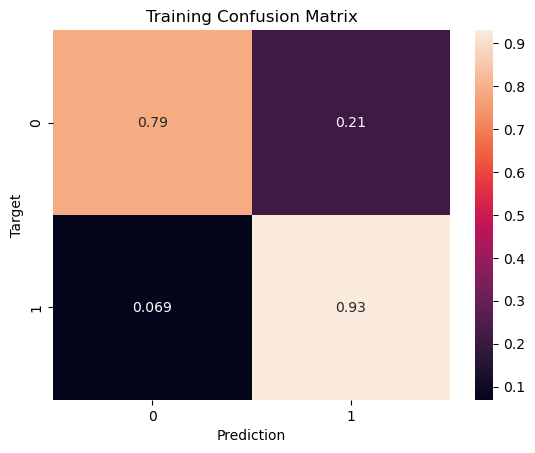

In [35]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')


Accuracy: 80.33%


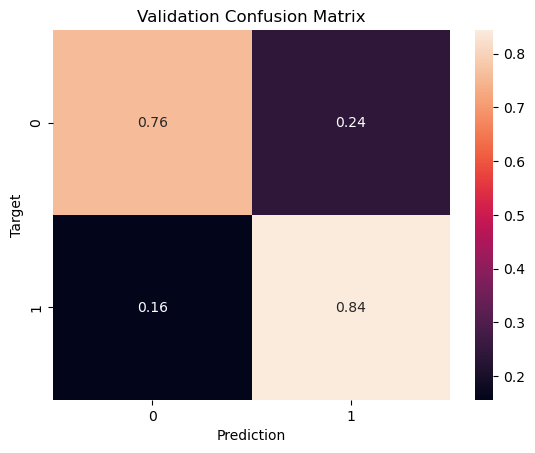

In [36]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 85.25%


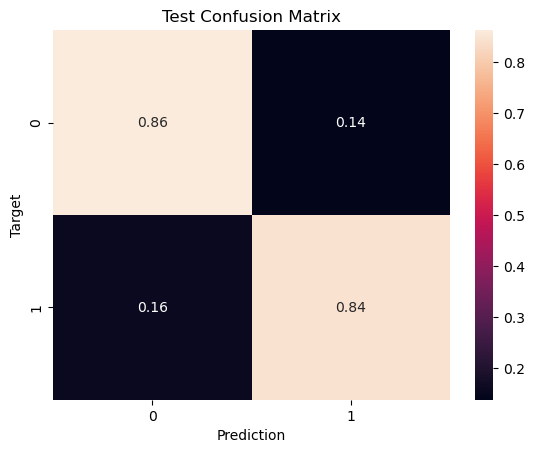

In [37]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

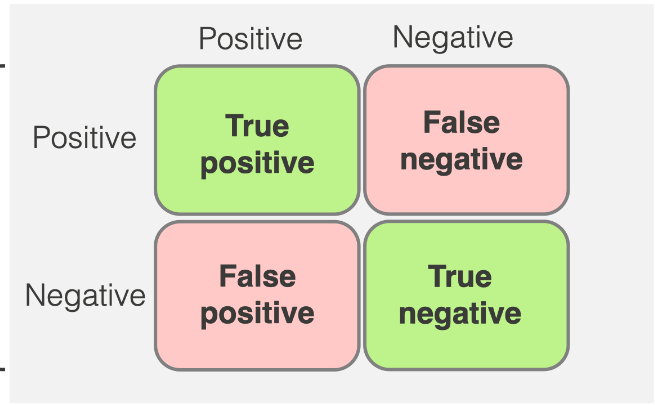

In [38]:
from IPython.display import Image
Image('confussion matrix.png')